In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
from control import bode, tf, hinfsyn
from control.matlab import logspace, feedback, step, nyquist, ss

from for_plot import bodeplot_set, plot_set

In [2]:
Kf = 9.512* 10**-1
m = 1 * 10**-3
Tp = 2.54* 10**-7
Kp = Kf/m/Tp

In [3]:
Pmech_info = {
 1:{"f":90, "gi":0.5, "Ai":1.0},
 2:{"f":4100, "gi":0.02, "Ai":-1.0},
 3:{"f":8200, "gi":0.02, "Ai":1.0},
 4:{"f":12300, "gi":0.02, "Ai":-1.0},
 5:{"f":16400, "gi":0.02, "Ai":1.0},
 6:{"f":3000, "gi":0.005, "Ai":0.01},
 7:{"f":5000, "gi":0.001, "Ai":0.03},
}

In [4]:
def calc_P_element(f_params):
    w_i = f_params["f"]*2*np.pi
    P_element = tf([0,0,f_params["Ai"]],[1, 2*f_params["gi"]*w_i, w_i**2])
    return P_element

In [5]:
def calc_P_mech(max_dim, dim_params):
    P_mech = 0
    for dim, param in dim_params.items():
        if dim > max_dim:
            break
        else:
            P_mech += calc_P_element(param)
    return P_mech


In [6]:
P_mech = calc_P_mech(7, Pmech_info)
P_nominal = calc_P_mech(1, Pmech_info)

c:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
c:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


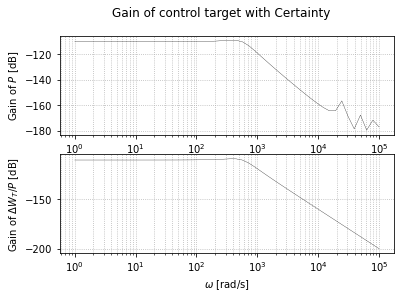

In [7]:
fig, ax = plt.subplots(2, 1)


gain, _, w = bode(P_mech, logspace(0, 5), Plot = False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)    
gain, _, w = bode(P_nominal, logspace(0, 5), Plot = False)
ax[1].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)   
bodeplot_set(ax)
ax[0].set_xlabel('$\omega$ [rad/s]')
ax[0].set_ylabel('Gain of $P$ [dB]')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Gain of $\Delta W_T/P$ [dB]')

fig.suptitle("Gain of control target with Certainty")
plt.show()

In [8]:
delta_m = (P_mech-P_nominal)/P_nominal


c:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


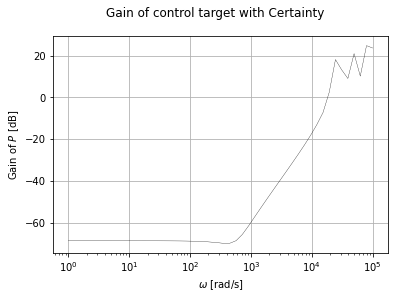

In [9]:
fig, ax = plt.subplots(1, 1)


gain, _, w = bode(delta_m, logspace(0, 5), Plot = False)
ax.semilogx(w, 20*np.log10(gain), color='k', lw=0.3)    
ax.set_xlabel('$\omega$ [rad/s]')
ax.set_ylabel('Gain of $P$ [dB]')
ax.grid()

fig.suptitle("Gain of control target with Certainty")
plt.show()

In [10]:
w_1 = 2*np.pi*4500
gz_1 = 0.3
w_2 = 2*np.pi*800
gz_2 = 1
gt = 22

In [11]:
s =tf('s')
Wt = ((s**2+2*gz_2*w_2*s+w_2**2)/(s**2+2*gz_1*w_1*s+w_1**2))**2*gt

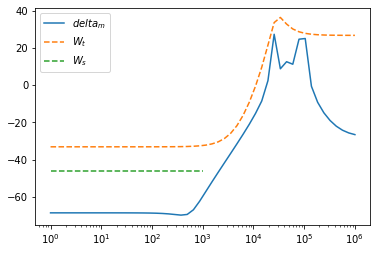

In [12]:

plt.figure(3)
#bodemag(Ws,Wt,'--',w);
Ws = 5*10**-3+s*0#tf([1, 2*np.pi*250],[1,2*np.pi*0.01])*1*10**-3
mag, phase, om  = bode(delta_m, logspace(0,6), plot=False);
mag2,phase2,om2 = bode(Wt, logspace(0,6), plot=False);
mag3, phase3, om3  = bode(Ws, logspace(0,3), plot=False);
plt.semilogx(om,  20*np.log10(mag), label='$delta_m$');
plt.semilogx(om2, 20*np.log10(mag2), '--', label='$W_t$');
plt.semilogx(om3, 20*np.log10(mag3), '--', label='$W_s$');
#legend('Ws','Wt',4);
plt.legend()


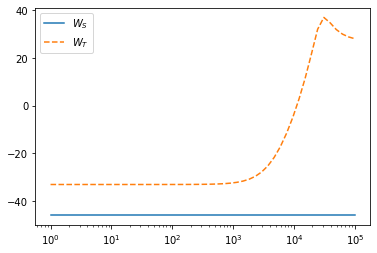

In [13]:
#%% 重み関数の定義
s = tf('s');
Weps = 0.04;          #% Weps
Ws = 5*10**-3+s*0

plt.figure(3)
#bodemag(Ws,Wt,'--',w);
mag, phase, om  = bode(Ws, logspace(0,5), plot=False);
mag2,phase2,om2 = bode(Wt, logspace(0,5), plot=False);
plt.semilogx(om,  20*np.log10(mag), label='$W_S$');
plt.semilogx(om2, 20*np.log10(mag2), '--', label='$W_T$');
#legend('Ws','Wt',4);z
plt.legend()
L = Ws*P_nominal
W_temp = Ws*Weps
num = [[L.num[0][0],    W_temp.num[0][0], (-L).num[0][0]], 
       [         [0],    [0],    Wt.num[0][0]],
       [P_nominal.num[0][0], [Weps], (-P_nominal).num[0][0]]]
den = [[L.den[0][0],    W_temp.den[0][0], (L).den[0][0]], 
       [         [1],    [1],    Wt.den[0][0]],
       [P_nominal.den[0][0],    [1], (P_nominal).den[0][0]]]
G_ = tf(num, den)
G = tf2ss(G_)


In [14]:
Ws = tf([5*10**-3],[1])
WsP = Ws*P_nominal;
WsE = Ws*Weps;
num = [[WsP.num[0][0], WsE.num[0][0], (-WsP).num[0][0]],
       [           [0],            [0],      Wt.num[0][0]], 
       [  P_nominal.num[0][0],         [Weps],   (-P_nominal).num[0][0]]];
den = [[WsP.den[0][0], WsE.den[0][0], (-WsP).den[0][0]],
       [           [1],            [1],      Wt.den[0][0]],
       [  P_nominal.den[0][0],            [1],   (-P_nominal).den[0][0]]];
G_ = tf(num, den)
G = tf2ss(G_)

In [15]:
W_temp

TransferFunction(array([0.0002]), array([1.]))

0.00020000488960486286


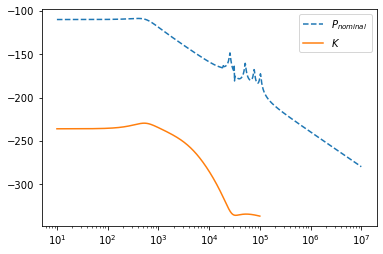

In [16]:
K, CL, gam, rcond = hinfsyn(G,1,1)
print( gam )

plt.figure(4)
mag1, phase1, om1 = bode( P_mech, plot=False );
plt.semilogx( om1, 20*np.log10(mag1), '--', label='$P_{nominal}$' );
mag2, phase2, om2 = bode( K, plot=False );
plt.semilogx( om2, 20*np.log10(mag2), label='$K$' );
plt.legend()

In [17]:
CL

StateSpace(array([[-3.44946873e+04,  2.17382956e-04,  1.90617986e+04,
        -7.20265979e-04,  2.82020761e+03,  6.56405277e+03,
         1.38230077e+04, -8.69345218e-05, -1.74289318e+04,
         7.26433351e-04, -2.76019119e+03, -6.55429694e+03],
       [-1.12220838e-01, -5.65587969e+02, -1.71034424e-01,
        -3.19864254e+02, -3.47543010e+01,  6.19233298e+02,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00000000e+05,  6.73899079e-04,  6.21951862e-06,
         3.93395391e-04,  1.01712726e-02, -1.79870523e-01,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  9.99900639e+02,  1.15087615e+01,
         1.01290550e-01, -2.17532326e+01,  2.83140745e+01,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,

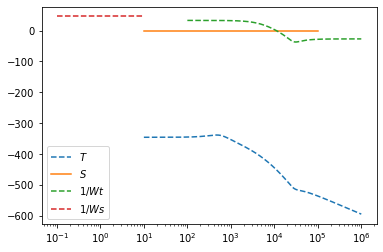

In [18]:
T = P_nominal*K/(1+P_nominal*K)
S = 1/(1+P_nominal*K)
plt.figure(5)
mag1, phase1, om1 = bode( T, plot=False );
plt.semilogx( om1, 20*np.log10(mag1), '--', label='$T$' );
mag2, phase2, om2 = bode( S, plot=False );
plt.semilogx( om2, 20*np.log10(mag2), label='$S$' );
mag1, phase1, om1 = bode( 1/Wt, plot=False );
plt.semilogx( om1, 20*np.log10(mag1), '--', label='$1/Wt$' );
mag2, phase2, om2 = bode(1/Ws, plot=False )
plt.semilogx( om2, 20*np.log10(mag2), '--', label='$1/Ws$')
plt.legend()

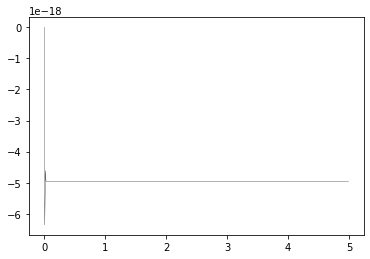

In [19]:
fig, ax = plt.subplots()
Gyr = feedback(tf2ss(P_nominal)*K, 1)
ref = 1      #目標値30
y, t = step(Gyr, np.arange(0, 5, 0.01))
ax.plot(t, y*ref, color='k', lw=0.3)

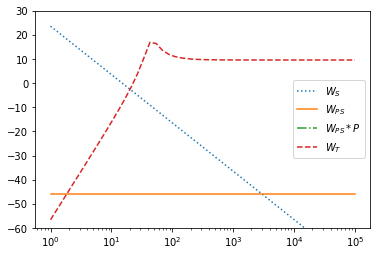

In [21]:
# 実践ロバスト制御4.3節
#プログラム4.5
import numpy as np
import matplotlib.pyplot as plt
import control
from control.matlab import *


s = tf('s');

#%% defgp2.m
#%% 重み関数の定義
Ws  = 15/(s + 1.5e-2);
Wps = 5*10**-3+s*0#Ws*0.8;
Weps = 0.04;


#%% 一般化プラントの定義
#Pn = P.nominal;
#systemnames   = 'Pn Wps Wt Weps';
#inputvar      = '[w1; w2; u]';
#outputvar     = '[Wps; Wt; Pn+Weps]';
#input_to_Pn   = '[w1 - u]';
#input_to_Wps  = '[Pn + Weps]';
#input_to_Wt   = '[ u ]';
#input_to_Weps = '[ w2 ]';
#G = sysic;


In [20]:
Pn = P_nominal
WpsP = Wps*Pn;
WpsE = Wps*Weps;
num = [[WpsP.num[0][0], WpsE.num[0][0], (-WpsP).num[0][0]],
       [           [0],            [0],      Wt.num[0][0]], 
       [  Pn.num[0][0],         [Weps],   (-Pn).num[0][0]]];
den = [[WpsP.den[0][0], WpsE.den[0][0], (-WpsP).den[0][0]],
       [           [1],            [1],      Wt.den[0][0]],
       [  Pn.den[0][0],            [1],   (-Pn).den[0][0]]];
G_ = tf(num, den)
G = tf2ss(G_)

#%% H-inf制御器の計算（実行4.4）
#[K,clp,gamma_min,hinf_info] = hinfsyn(G,1,1,'display','on');
K, CL, gam, rcond = control.hinfsyn(G,1,1)
print(gam)

plt.figure(4)
mag1, phase1, om1 = bode( P_nominal, plot=False );
plt.semilogx( om1, 20*np.log10(mag1), '--', label='$P_{nominal}$' );
mag2, phase2, om2 = bode( K, plot=False );
plt.semilogx( om2, 20*np.log10(mag2), label='$K$' );
plt.ylim(-60, 60);
plt.xlim(1e0, 1e2);
plt.legend();


NameError: name 'Wps' is not defined

In [ ]:

#%% chkperf2.m
#%% 閉ループ特性の確認
L = P_nominal*K;
T = feedback(L,1); #% T = L/(1+L)
S = feedback(1,L); #% S = 1/(1+L)
plt.figure(5);
#bodemag(T.nominal,'-',1/Wt,':',S.nominal,'--',1/(Wps*P.nominal),'-.',w);
#legend('T.nomial','1/Wt','S.nominal','1/(Wps*P)',2)
mag, phase, om = bode( T, w, plot=False );
plt.semilogx( om, 20*np.log10(mag), '-', label='$T$' );
mag, phase, om = bode( 1/Wt, w, plot=False );
plt.semilogx( om, 20*np.log10(mag), ':', label='$1/W_T$' );
mag, phase, om = bode( S, w, plot=False );
plt.semilogx( om, 20*np.log10(mag), '--', label='$S$' );
mag, phase, om = bode( 1/(Wps*P_nominal), w, plot=False );
plt.semilogx( om, 20*np.log10(mag), '-.', label='$1/(W_{PS}*P)$' );
plt.xlim(1e0, 1e2);
plt.ylim(-30, 30);
plt.legend();

delta = np.arange(-1, 1.01 , 0.1)
for i in range(len(delta)):
    k2 = 300+300*0.2*delta[i];
    K_ = np.matrix([ [ k1+k2, -k2 ],
                     [ -k2,    k2 ] ]);
    Ap = np.concatenate([
         np.concatenate([np.zeros((2,2)),  np.eye(2)], axis=1),
         np.concatenate([         -iM*K_,     -iM*C ], axis=1) ]);
    P = ss(Ap,Bp,Cp,Dp);
    L = P*K;
    T = feedback(L,1); #% T = L/(1+L)
    M = feedback(P,K); #% M = P/(1+L)
    yout, time = step( T, 2 );
    plt.figure(6);
    plt.plot(time, yout);
    yout, time = impulse( M, 2 );
    plt.figure(7);
    plt.plot(time, yout);